In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data_array= dataset.values

In [ ]:
data_array

array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

In [ ]:
data_array.shape

(10000, 14)

In [ ]:
x=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
print(x.shape,y.shape)

(10000, 10) (10000,)


In [ ]:
The dependent variable (Exited), the value that we are going to predict,
 will be the exit of the customer from the bank (binary variable 0 if the customer stays and 1 if the client exit).

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()
x[:,2]= labelencoder_X_2.fit_transform(x[:,2])

onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

x = np.array(onehotencoder.fit_transform(x), dtype=np.float)

In [ ]:
x.shape

(10000, 12)

In [ ]:
we split dataset to train,test,validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
print(x_train.shape,y_train.shape)

(7000, 12) (7000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_val =sc.fit_transform(x_val)

In [ ]:
x_val[0]

array([-0.97108454, -0.60919223,  1.76021608, -1.35942795,  0.88760502,
       -0.32168395,  0.64552433, -1.26970673,  0.79012861,  0.65881288,
       -1.01207287, -0.69650017])

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
x_train.shape

(7000, 12)

In [ ]:
classifier1 = Sequential()
classifier1.add(Dense( 6 , activation ='relu' , input_dim =12 ))
classifier1.add(Dropout(rate=0.1))
#second hidden layer
classifier1.add(Dense(6, activation='relu'))
classifier1.add(Dropout(rate=0.1))
#output layer
classifier1.add(Dense(1, activation='sigmoid'))

In [ ]:
print(classifier1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
COMPILE MODEL

In [ ]:
classifier1.compile( optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])


In [ ]:
FIT MODEL

In [ ]:
classifier1.fit(x_train , y_train , batch_size = 10 ,epochs = 25)

Epoch 1/25
700/700 [==============================] - 2s 3ms/step - loss: 0.5393 - accuracy: 0.7689
Epoch 2/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4530 - accuracy: 0.8003
Epoch 3/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4391 - accuracy: 0.8067
Epoch 4/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4314 - accuracy: 0.8104
Epoch 5/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.8143
Epoch 6/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4233 - accuracy: 0.8131
Epoch 7/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4191 - accuracy: 0.8139
Epoch 8/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4115 - accuracy: 0.8186
Epoch 9/25
700/700 [==============================] - 2s 3ms/step - loss: 0.4113 - accuracy: 0.8237
Epoch 10/25
700/700 [==============================] - 2s 3ms/step - loss: 0.3999 - accuracy: 0.8237

In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(6 , activation = 'relu', input_dim = 12 ))
model.add(Dropout(rate = 0.1))
model.add(Dense(6 ,activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1 , activation= 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = 'accuracy')

history = model.fit(x_train , y_train , batch_size = 10 , epochs = 30 ,validation_data=(x_val, y_val))




Epoch 1/30
700/700 [==============================] - 3s 3ms/step - loss: 0.6322 - accuracy: 0.6707 - val_loss: 0.4987 - val_accuracy: 0.7827
Epoch 2/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8006 - val_loss: 0.4505 - val_accuracy: 0.8000
Epoch 3/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4498 - accuracy: 0.8070 - val_loss: 0.4387 - val_accuracy: 0.8100
Epoch 4/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.8151 - val_loss: 0.4313 - val_accuracy: 0.8193
Epoch 5/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4346 - accuracy: 0.8177 - val_loss: 0.4244 - val_accuracy: 0.8233
Epoch 6/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4335 - accuracy: 0.8219 - val_loss: 0.4244 - val_accuracy: 0.8273
Epoch 7/30
700/700 [==============================] - 2s 3ms/step - loss: 0.4305 - accuracy: 0.8223 - val_loss: 0.4197 - val_accuracy: 0.8320
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


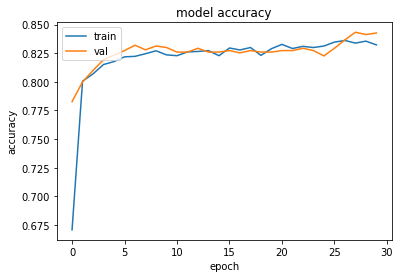

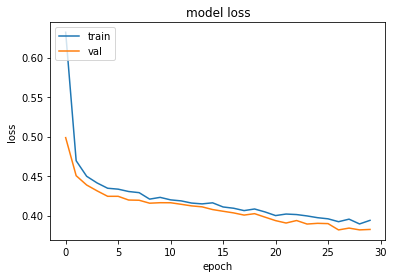

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss' , patience=0 , min_delta=0.001,
    mode='max')
history = model.fit(x_train, y_train, epochs=30, validation_split=0.15, batch_size=10, verbose=2,callbacks=[early_stopping])



Epoch 1/30
595/595 - 1s - loss: 0.3917 - accuracy: 0.8318 - val_loss: 0.3627 - val_accuracy: 0.8495


In [ ]:
#model checkpoint
from keras.callbacks import ModelCheckpoint
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(x, y, validation_split=0.15, epochs=5, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.81800, saving model to weights-improvement-01-0.82.hdf5

Epoch 00002: val_accuracy did not improve from 0.81800

Epoch 00003: val_accuracy did not improve from 0.81800

Epoch 00004: val_accuracy did not improve from 0.81800

Epoch 00005: val_accuracy did not improve from 0.81800


In [ ]:
scores = classifier1.evaluate(x_test, y_test, verbose=0)
print(classifier1.summary())
# Final evaluation of the model
print("accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None
accuracy: 86.40%


In [ ]:
classifier1

In [ ]:
y_pred=classifier1.predict(x_test)

In [ ]:
y_pred

array([[0.04599905],
       [0.30697334],
       [0.04864647],
       ...,
       [0.06906309],
       [0.11287735],
       [0.13039891]], dtype=float32)

In [ ]:
y_pred= y_pred>0.5

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])